In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/Thesis_Facial_Exp_Recognition/Dataset/FER-2013

/content/drive/MyDrive/Thesis_Facial_Exp_Recognition/Dataset/FER-2013


In [ ]:
!ls

archive-FER-2013-Kaggle.zip  test  train


In [ ]:
#Extraer FER-2013
'''import zipfile

zipfilename = "archive-FER-2013-Kaggle.zip"
password = None

# open and extract all files in the zip
z = zipfile.ZipFile(zipfilename, "r")
try:
    z.extractall(pwd=password)
except:
    print('Error')
    pass
z.close()'''

In [ ]:
import pandas as pd
import cv2
import numpy as np 
from sklearn.model_selection import train_test_split
import os
files=os.listdir('/content/drive/MyDrive/Thesis_Facial_Exp_Recognition/Dataset/FER-2013/train')
files

['happy', 'angry', 'disgust', 'fear', 'neutral', 'sad', 'surprise']

In [ ]:
import os,cv2
directory='/content/drive/MyDrive/Thesis_Facial_Exp_Recognition/Dataset/FER-2013/train'
dir_list=os.listdir(directory)
image_data_list=[]
labels=[]
emotions=[]
l=0
for data_dir in dir_list:
    data_list=os.listdir(directory+'/'+data_dir)
    for img in data_list:
        input_img=cv2.imread(directory+'/'+data_dir+'/'+img)
        input_img=cv2.resize(input_img,(48,48))
        image_data_list.append(input_img)
        labels.append(l)
    emotions.append(data_dir)
    l=l+1
img_data=np.array(image_data_list)
img_data=img_data/255
img_data.shape

(28709, 48, 48, 3)

In [ ]:
#Guardar matrices
'''np.save("img_data.npy", img_data)
np.save("emotions.npy", emotions)
np.save("labels",labels)'''
#Cargar matrices guardadas (preprocesado de imagenes)
img_data = np.load(img_data.npy)
emotions = np.load(emotions.npy)
labels = np.load(labels.npy)

In [ ]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
num_classes=7
emotions = pd.get_dummies(labels).values
#Y = keras.utils.to_categorical(labels, num_classes)
X_train, X_test, y_train, y_test = train_test_split(img_data, emotions, test_size=0.2)

In [ ]:
emotions.shape

(28709, 7)

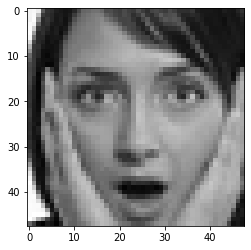

In [ ]:
from matplotlib import pyplot as plt
plt.imshow(img_data[27500], interpolation='nearest')
plt.show()

In [ ]:
from keras.callbacks import CSVLogger, ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
from keras import layers
from keras.layers import Activation, Convolution2D, Conv2D, Dropout, AveragePooling2D, BatchNormalization, GlobalAveragePooling2D, Flatten, Input, MaxPooling2D, SeparableConv2D

In [ ]:
from keras.models import Model

In [ ]:
from keras.regularizers import l2

In [ ]:
#parameters 

batch_size = 32
epochs = 50
image_shape = (48, 48, 3)
verbose = True 
num_class = 7
patience = 50  # number of epochs with no improvement after which training will be stopped
base_path = './'
l2_regularization = 0.01

In [ ]:
data_generator = ImageDataGenerator(featurewise_center=False, featurewise_std_normalization=False, rotation_range=10, 
                                    width_shift_range=0.1, height_shift_range=0.1, zoom_range=.1, horizontal_flip=True)

In [ ]:
regularization = l2(l2_regularization)

In [ ]:
# model
image_input = Input(image_shape)
x = Conv2D(filters=8, kernel_size=(3,3), strides=(1,1), kernel_regularizer=regularization, use_bias=False)(image_input)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(filters=8, kernel_size=(3,3), strides=(1,1), kernel_regularizer=regularization, use_bias=False)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

# module 1
# residual module 
residual = Conv2D(filters=16, kernel_size=(1,1), strides=(2,2), padding='same', use_bias=False)(x)
residual = BatchNormalization()(residual)

x = SeparableConv2D(filters=16, kernel_size=(3,3), padding='same', kernel_regularizer=regularization, use_bias=False)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = SeparableConv2D(filters=16, kernel_size=(3,3), padding='same', kernel_regularizer=regularization, use_bias=False)(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same')(x)
x = layers.add([x,residual])

# module 2
# residual module 
residual = Conv2D(filters=32, kernel_size=(1,1), strides=(2,2), padding='same', use_bias=False)(x)
residual = BatchNormalization()(residual)

x = SeparableConv2D(filters=32, kernel_size=(3,3), padding='same', kernel_regularizer=regularization, use_bias=False)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = SeparableConv2D(filters=32, kernel_size=(3,3), padding='same', kernel_regularizer=regularization, use_bias=False)(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same')(x)
x = layers.add([x,residual])

# module 3
# residual module 
residual = Conv2D(filters=64, kernel_size=(1,1), strides=(2,2), padding='same', use_bias=False)(x)
residual = BatchNormalization()(residual)

x = SeparableConv2D(filters=64, kernel_size=(3,3), padding='same', kernel_regularizer=regularization, use_bias=False)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = SeparableConv2D(filters=64, kernel_size=(3,3), padding='same', kernel_regularizer=regularization, use_bias=False)(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same')(x)
x = layers.add([x,residual])

# module 4
# residual module 
residual = Conv2D(filters=128, kernel_size=(1,1), strides=(2,2), padding='same', use_bias=False)(x)
residual = BatchNormalization()(residual)

x = SeparableConv2D(filters=128, kernel_size=(3,3), padding='same', kernel_regularizer=regularization, use_bias=False)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = SeparableConv2D(filters=128, kernel_size=(3,3), padding='same', kernel_regularizer=regularization, use_bias=False)(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same')(x)
x = layers.add([x,residual])

x = Conv2D(filters=num_class, kernel_size=(3,3), padding='same')(x)
x = GlobalAveragePooling2D()(x)

output = Activation('softmax', name='predictions')(x)

In [ ]:
model = Model(image_input, output)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 48, 48, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 46, 46, 8)    216         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 46, 46, 8)    32          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 46, 46, 8)    0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [ ]:
# callbacks 
early_stop = EarlyStopping(monitor='val_loss', patience=patience)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=int(patience/4), verbose=verbose)

trained_models_path = base_path + '_mini_xception'
model_names = trained_models_path + 'model.hdf5'
model_checkpoint = ModelCheckpoint(filepath=model_names, monitor='val_loss', verbose=verbose, save_best_only=True)

callbacks = [model_checkpoint,  early_stop, reduce_lr]

In [ ]:
model.fit_generator(data_generator.flow(X_train, y_train, batch_size), 
                  steps_per_epoch=len(X_train)/batch_size, epochs=epochs, verbose=verbose, 
                  callbacks=callbacks, validation_data=(X_test, y_test))

Epoch 1/50
  1/717 [..............................] - ETA: 44s - loss: 2.2647 - accuracy: 0.1875

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


717/717 [==============================] - 28s 40ms/step - loss: 1.8193 - accuracy: 0.3106 - val_loss: 1.6258 - val_accuracy: 0.3971

Epoch 00001: val_loss improved from inf to 1.62582, saving model to ./_mini_xceptionmodel.hdf5


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/50
717/717 [==============================] - 26s 37ms/step - loss: 1.5845 - accuracy: 0.4016 - val_loss: 1.6550 - val_accuracy: 0.3931

Epoch 00002: val_loss did not improve from 1.62582
Epoch 3/50
717/717 [==============================] - 27s 38ms/step - loss: 1.4552 - accuracy: 0.4518 - val_loss: 1.4670 - val_accuracy: 0.4547

Epoch 00003: val_loss improved from 1.62582 to 1.46697, saving model to ./_mini_xceptionmodel.hdf5
Epoch 4/50
717/717 [==============================] - 28s 39ms/step - loss: 1.3823 - accuracy: 0.4811 - val_loss: 1.6326 - val_accuracy: 0.4343

Epoch 00004: val_loss did not improve from 1.46697
Epoch 5/50
717/717 [==============================] - 25s 35ms/step - loss: 1.3275 - accuracy: 0.5029 - val_loss: 1.7410 - val_accuracy: 0.3870

Epoch 00005: val_loss did not improve from 1.46697
Epoch 6/50
717/717 [==============================] - 26s 37ms/step - loss: 1.2805 - accuracy: 0.5187 - val_loss: 1.3854 - val_accuracy: 0.4946

Epoch 00006: val_loss i

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_true = y_test

In [ ]:
y_true = np.argmax(y_true,axis=1)

In [ ]:
y_pred = np.argmax(y_pred>0.5,axis=1)

In [ ]:
from sklearn.metrics import classification_report
target_names = ['surprise', 'fear', 'angry', 'neutral', 'sad', 'disgust', 'happy']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    surprise       0.46      0.88      0.61      1433
        fear       0.70      0.30      0.42       764
       angry       0.72      0.27      0.39        97
     neutral       0.53      0.33      0.40       825
         sad       0.57      0.57      0.57      1026
     disgust       0.56      0.30      0.39       948
       happy       0.74      0.68      0.71       649

    accuracy                           0.54      5742
   macro avg       0.61      0.48      0.50      5742
weighted avg       0.57      0.54      0.52      5742



In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)

In [ ]:
import tensorflow as tf
confusion_matrix = tf.math.confusion_matrix(labels=y_true, predictions=y_pred).numpy()
confusion_matrix = np.around(confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis], decimals=2)

In [ ]:
confusion_matrix = pd.DataFrame(confusion_matrix,
                                index = target_names, 
                                columns = target_names)

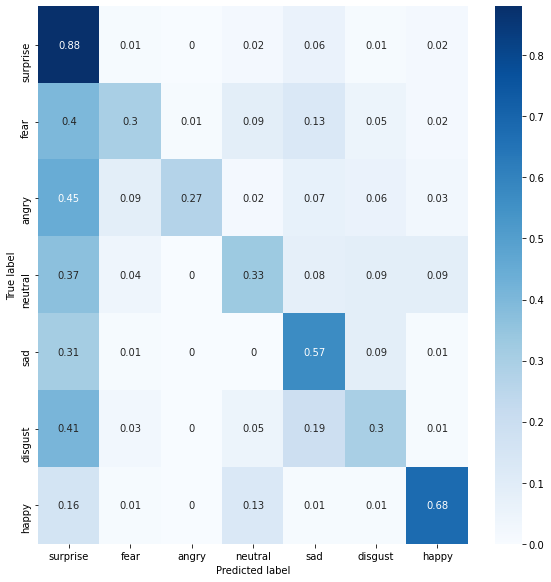

In [ ]:
import seaborn as sns
figure = plt.figure(figsize=(8, 8))
sns.heatmap(confusion_matrix, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()